In [285]:
import torch
import torch.optim as optim

import pandas as pd

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()


pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 500)

pd.set_option('display.max_colwidth', 1)

In [286]:
df = pd.read_csv("marketing_customer_analysis_clean.csv")
df.head()

,unnamed:_0,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type,month
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2011-02-18,Employed,M,48029,Suburban,Married,61,7.000000,52,0.000000,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,A,2
1,1,KX64629,California,2228.525238,No,Basic,College,2011-01-18,Unemployed,F,0,Suburban,Single,64,3.000000,26,0.000000,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,A,1
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2011-02-10,Employed,M,22139,Suburban,Single,100,34.000000,31,0.000000,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A,2
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,2011-01-11,Employed,M,49078,Suburban,Single,97,10.000000,3,0.000000,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A,1
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,2011-01-17,Medical Leave,F,23675,Suburban,Married,117,15.149071,31,0.384256,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,A,1


### Encoding categorical columns

In [288]:
# #Transfoming "state" to numerical

# print(df["state"].value_counts())
# enc.fit(df['state'])
# df['state'] = enc.transform(df['state'])

In [289]:
#Transfoming "state" to numerical
df = pd.get_dummies(df, columns = ['state'])
df.iloc[:, -5:] = df.iloc[:, -5:].astype(int)

In [290]:
df

,unnamed:_0,customer,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type,month,state_Arizona,state_California,state_Nevada,state_Oregon,state_Washington
0,0,DK49336,4809.216960,No,Basic,College,2011-02-18,Employed,M,48029,Suburban,Married,61,7.000000,52,0.000000,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,A,2,1,0,0,0,0
1,1,KX64629,2228.525238,No,Basic,College,2011-01-18,Unemployed,F,0,Suburban,Single,64,3.000000,26,0.000000,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,A,1,0,1,0,0,0
2,2,LZ68649,14947.917300,No,Basic,Bachelor,2011-02-10,Employed,M,22139,Suburban,Single,100,34.000000,31,0.000000,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A,2,0,0,0,0,1
3,3,XL78013,22332.439460,Yes,Extended,College,2011-01-11,Employed,M,49078,Suburban,Single,97,10.000000,3,0.000000,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A,1,0,0,0,1,0
4,4,QA50777,9025.067525,No,Premium,Bachelor,2011-01-17,Medical Leave,F,23675,Suburban,Married,117,15.149071,31,0.384256,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,A,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,10905,FE99816,15563.369440,No,Premium,Bachelor,2011-01-19,Unemployed,F,0,Suburban,Married,253,15.149071,40,0.384256,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,A,1,0,0,1,0,0
10906,10906,KX53892,5259.444853,No,Basic,College,2011-01-06,Employed,F,61146,Urban,Married,65,7.000000,68,0.000000,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A,1,0,0,0,1,0
10907,10907,TL39050,23893.304100,No,Extended,Bachelor,2011-02-06,Employed,F,39837,Rural,Married,201,11.000000,63,0.000000,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,A,2,1,0,0,0,0
10908,10908,WA60547,11971.977650,No,Premium,College,2011-02-13,Employed,F,64195,Urban,Divorced,158,0.000000,27,4.000000,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize,A,2,0,1,0,0,0


In [291]:
# #Transfoming "response" to numerical

# print(df["response"].value_counts())
# enc.fit(df['response'])
# df['response'] = enc.transform(df['response'])

In [292]:
#Transfoming "response" to numerical

df = pd.get_dummies(df, columns = ['response'], drop_first=True)

In [293]:
df.iloc[:, -1:] = df.iloc[:, -1:].astype(int)
df

,unnamed:_0,customer,customer_lifetime_value,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type,month,state_Arizona,state_California,state_Nevada,state_Oregon,state_Washington,response_Yes
0,0,DK49336,4809.216960,Basic,College,2011-02-18,Employed,M,48029,Suburban,Married,61,7.000000,52,0.000000,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,A,2,1,0,0,0,0,0
1,1,KX64629,2228.525238,Basic,College,2011-01-18,Unemployed,F,0,Suburban,Single,64,3.000000,26,0.000000,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,A,1,0,1,0,0,0,0
2,2,LZ68649,14947.917300,Basic,Bachelor,2011-02-10,Employed,M,22139,Suburban,Single,100,34.000000,31,0.000000,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A,2,0,0,0,0,1,0
3,3,XL78013,22332.439460,Extended,College,2011-01-11,Employed,M,49078,Suburban,Single,97,10.000000,3,0.000000,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A,1,0,0,0,1,0,1
4,4,QA50777,9025.067525,Premium,Bachelor,2011-01-17,Medical Leave,F,23675,Suburban,Married,117,15.149071,31,0.384256,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,A,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,10905,FE99816,15563.369440,Premium,Bachelor,2011-01-19,Unemployed,F,0,Suburban,Married,253,15.149071,40,0.384256,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,A,1,0,0,1,0,0,0
10906,10906,KX53892,5259.444853,Basic,College,2011-01-06,Employed,F,61146,Urban,Married,65,7.000000,68,0.000000,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A,1,0,0,0,1,0,0
10907,10907,TL39050,23893.304100,Extended,Bachelor,2011-02-06,Employed,F,39837,Rural,Married,201,11.000000,63,0.000000,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,A,2,1,0,0,0,0,0
10908,10908,WA60547,11971.977650,Premium,College,2011-02-13,Employed,F,64195,Urban,Divorced,158,0.000000,27,4.000000,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize,A,2,0,1,0,0,0,0


In [294]:
#Transfoming "coverage" to numerical

print(df["coverage"].value_counts())
enc.fit(df['coverage'])
df['coverage'] = enc.transform(df['coverage'])

coverage
Basic       6660
Extended    3265
Premium     985 
Name: count, dtype: int64


In [295]:
#Transfoming "education" to numerical

print(df["education"].value_counts())
enc.fit(df['education'])
df['education'] = enc.transform(df['education'])

education
Bachelor                3272
College                 3204
High School or Below    3146
Master                  887 
Doctor                  401 
Name: count, dtype: int64


In [296]:
# #Transfoming "employmentstatus" to numerical

# print(df["employmentstatus"].value_counts())
# enc.fit(df['employmentstatus'])
# df['employmentstatus'] = enc.transform(df['employmentstatus'])

In [308]:
#Transfoming "response" to numerical

df = pd.get_dummies(df, columns = ['employmentstatus'])

In [312]:
df.iloc[:, -5:] = df.iloc[:, -5:].astype(int)
df

,unnamed:_0,customer,customer_lifetime_value,coverage,education,effective_to_date,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type,month,state_Arizona,state_California,state_Nevada,state_Oregon,state_Washington,response_Yes,employmentstatus_Disabled,employmentstatus_Employed,employmentstatus_Medical Leave,employmentstatus_Retired,employmentstatus_Unemployed
0,0,DK49336,4809.216960,0,1,2011-02-18,M,48029,Suburban,Married,61,7.000000,52,0.000000,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,A,2,1,0,0,0,0,0,0,1,0,0,0
1,1,KX64629,2228.525238,0,1,2011-01-18,F,0,Suburban,Single,64,3.000000,26,0.000000,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,A,1,0,1,0,0,0,0,0,0,0,0,1
2,2,LZ68649,14947.917300,0,0,2011-02-10,M,22139,Suburban,Single,100,34.000000,31,0.000000,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A,2,0,0,0,0,1,0,0,1,0,0,0
3,3,XL78013,22332.439460,1,1,2011-01-11,M,49078,Suburban,Single,97,10.000000,3,0.000000,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A,1,0,0,0,1,0,1,0,1,0,0,0
4,4,QA50777,9025.067525,2,0,2011-01-17,F,23675,Suburban,Married,117,15.149071,31,0.384256,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,A,1,0,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,10905,FE99816,15563.369440,2,0,2011-01-19,F,0,Suburban,Married,253,15.149071,40,0.384256,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,A,1,0,0,1,0,0,0,0,0,0,0,1
10906,10906,KX53892,5259.444853,0,1,2011-01-06,F,61146,Urban,Married,65,7.000000,68,0.000000,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A,1,0,0,0,1,0,0,0,1,0,0,0
10907,10907,TL39050,23893.304100,1,0,2011-02-06,F,39837,Rural,Married,201,11.000000,63,0.000000,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,A,2,1,0,0,0,0,0,0,1,0,0,0
10908,10908,WA60547,11971.977650,2,1,2011-02-13,F,64195,Urban,Divorced,158,0.000000,27,4.000000,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize,A,2,0,1,0,0,0,0,0,1,0,0,0


In [314]:
#Transfoming "gender" to numerical

print(df["gender"].value_counts())
enc.fit(df['gender'])
df['gender'] = enc.transform(df['gender'])

gender
F    5573
M    5337
Name: count, dtype: int64


In [10]:
# #Transfoming "location_code" to numerical

# print(df["location_code"].value_counts())
# enc.fit(df['location_code'])
# df['location_code'] = enc.transform(df['location_code'])

location_code
Suburban    6902
Rural       2116
Urban       1892
Name: count, dtype: int64


In [316]:
#Transfoming "location_code" to numerical

df = pd.get_dummies(df, columns = ['location_code'])

In [318]:
df.iloc[:, -3:] = df.iloc[:, -3:].astype(int)
df

,unnamed:_0,customer,customer_lifetime_value,coverage,education,effective_to_date,gender,income,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type,month,state_Arizona,state_California,state_Nevada,state_Oregon,state_Washington,response_Yes,employmentstatus_Disabled,employmentstatus_Employed,employmentstatus_Medical Leave,employmentstatus_Retired,employmentstatus_Unemployed,location_code_Rural,location_code_Suburban,location_code_Urban
0,0,DK49336,4809.216960,0,1,2011-02-18,1,48029,Married,61,7.000000,52,0.000000,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,A,2,1,0,0,0,0,0,0,1,0,0,0,0,1,0
1,1,KX64629,2228.525238,0,1,2011-01-18,0,0,Single,64,3.000000,26,0.000000,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,A,1,0,1,0,0,0,0,0,0,0,0,1,0,1,0
2,2,LZ68649,14947.917300,0,0,2011-02-10,1,22139,Single,100,34.000000,31,0.000000,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A,2,0,0,0,0,1,0,0,1,0,0,0,0,1,0
3,3,XL78013,22332.439460,1,1,2011-01-11,1,49078,Single,97,10.000000,3,0.000000,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A,1,0,0,0,1,0,1,0,1,0,0,0,0,1,0
4,4,QA50777,9025.067525,2,0,2011-01-17,0,23675,Married,117,15.149071,31,0.384256,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,A,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,10905,FE99816,15563.369440,2,0,2011-01-19,0,0,Married,253,15.149071,40,0.384256,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,A,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0
10906,10906,KX53892,5259.444853,0,1,2011-01-06,0,61146,Married,65,7.000000,68,0.000000,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1
10907,10907,TL39050,23893.304100,1,0,2011-02-06,0,39837,Married,201,11.000000,63,0.000000,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,A,2,1,0,0,0,0,0,0,1,0,0,0,1,0,0
10908,10908,WA60547,11971.977650,2,1,2011-02-13,0,64195,Divorced,158,0.000000,27,4.000000,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize,A,2,0,1,0,0,0,0,0,1,0,0,0,0,0,1


In [11]:
# #Transfoming "marital_status" to numerical

# print(df["marital_status"].value_counts())
# enc.fit(df['marital_status'])
# df['marital_status'] = enc.transform(df['marital_status'])

marital_status
Married     6319
Single      2958
Divorced    1633
Name: count, dtype: int64


In [320]:
#Transfoming "marital_status" to numerical

df = pd.get_dummies(df, columns = ['marital_status'])

In [322]:
df.iloc[:, -3:] = df.iloc[:, -3:].astype(int)
df

,unnamed:_0,customer,customer_lifetime_value,coverage,education,effective_to_date,gender,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type,month,state_Arizona,state_California,state_Nevada,state_Oregon,state_Washington,response_Yes,employmentstatus_Disabled,employmentstatus_Employed,employmentstatus_Medical Leave,employmentstatus_Retired,employmentstatus_Unemployed,location_code_Rural,location_code_Suburban,location_code_Urban,marital_status_Divorced,marital_status_Married,marital_status_Single
0,0,DK49336,4809.216960,0,1,2011-02-18,1,48029,61,7.000000,52,0.000000,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,A,2,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0
1,1,KX64629,2228.525238,0,1,2011-01-18,0,0,64,3.000000,26,0.000000,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,A,1,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1
2,2,LZ68649,14947.917300,0,0,2011-02-10,1,22139,100,34.000000,31,0.000000,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A,2,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1
3,3,XL78013,22332.439460,1,1,2011-01-11,1,49078,97,10.000000,3,0.000000,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A,1,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,1
4,4,QA50777,9025.067525,2,0,2011-01-17,0,23675,117,15.149071,31,0.384256,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,A,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,10905,FE99816,15563.369440,2,0,2011-01-19,0,0,253,15.149071,40,0.384256,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,A,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0
10906,10906,KX53892,5259.444853,0,1,2011-01-06,0,61146,65,7.000000,68,0.000000,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0
10907,10907,TL39050,23893.304100,1,0,2011-02-06,0,39837,201,11.000000,63,0.000000,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,A,2,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
10908,10908,WA60547,11971.977650,2,1,2011-02-13,0,64195,158,0.000000,27,4.000000,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize,A,2,0,1,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0


In [12]:
# #Transfoming "policy_type" to numerical

# print(df["policy_type"].value_counts())
# enc.fit(df['policy_type'])
# df['policy_type'] = enc.transform(df['policy_type'])

policy_type
Personal Auto     8128
Corporate Auto    2341
Special Auto      441 
Name: count, dtype: int64


In [324]:
#Transfoming "policy_type" to numerical

df = pd.get_dummies(df, columns = ['policy_type'])

In [326]:
df.iloc[:, -3:] = df.iloc[:, -3:].astype(int)
df

,unnamed:_0,customer,customer_lifetime_value,coverage,education,effective_to_date,gender,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type,month,state_Arizona,state_California,state_Nevada,state_Oregon,state_Washington,response_Yes,employmentstatus_Disabled,employmentstatus_Employed,employmentstatus_Medical Leave,employmentstatus_Retired,employmentstatus_Unemployed,location_code_Rural,location_code_Suburban,location_code_Urban,marital_status_Divorced,marital_status_Married,marital_status_Single,policy_type_Corporate Auto,policy_type_Personal Auto,policy_type_Special Auto
0,0,DK49336,4809.216960,0,1,2011-02-18,1,48029,61,7.000000,52,0.000000,9,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,A,2,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0
1,1,KX64629,2228.525238,0,1,2011-01-18,0,0,64,3.000000,26,0.000000,1,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,A,1,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0
2,2,LZ68649,14947.917300,0,0,2011-02-10,1,22139,100,34.000000,31,0.000000,2,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A,2,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0
3,3,XL78013,22332.439460,1,1,2011-01-11,1,49078,97,10.000000,3,0.000000,2,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A,1,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,1,1,0,0
4,4,QA50777,9025.067525,2,0,2011-01-17,0,23675,117,15.149071,31,0.384256,7,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,A,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,10905,FE99816,15563.369440,2,0,2011-01-19,0,0,253,15.149071,40,0.384256,7,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,A,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0
10906,10906,KX53892,5259.444853,0,1,2011-01-06,0,61146,65,7.000000,68,0.000000,6,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0
10907,10907,TL39050,23893.304100,1,0,2011-02-06,0,39837,201,11.000000,63,0.000000,2,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,A,2,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0
10908,10908,WA60547,11971.977650,2,1,2011-02-13,0,64195,158,0.000000,27,4.000000,6,Personal L1,Offer1,Branch,618.288849,SUV,Medsize,A,2,0,1,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,1,0


In [13]:
# #Transfoming "policy" to numerical

# print(df["policy"].value_counts())
# enc.fit(df['policy'])
# df['policy'] = enc.transform(df['policy'])

policy
Personal L3     4118
Personal L2     2537
Personal L1     1473
Corporate L3    1221
Corporate L2    688 
Corporate L1    432 
Special L2      193 
Special L3      170 
Special L1      78  
Name: count, dtype: int64


In [328]:
#Transfoming "policy" to numerical

df = pd.get_dummies(df, columns = ['policy'])

In [332]:
df.iloc[:, -9:] = df.iloc[:, -9:].astype(int)
df

,unnamed:_0,customer,customer_lifetime_value,coverage,education,effective_to_date,gender,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type,month,state_Arizona,state_California,state_Nevada,state_Oregon,state_Washington,response_Yes,employmentstatus_Disabled,employmentstatus_Employed,employmentstatus_Medical Leave,employmentstatus_Retired,employmentstatus_Unemployed,location_code_Rural,location_code_Suburban,location_code_Urban,marital_status_Divorced,marital_status_Married,marital_status_Single,policy_type_Corporate Auto,policy_type_Personal Auto,policy_type_Special Auto,policy_Corporate L1,policy_Corporate L2,policy_Corporate L3,policy_Personal L1,policy_Personal L2,policy_Personal L3,policy_Special L1,policy_Special L2,policy_Special L3
0,0,DK49336,4809.216960,0,1,2011-02-18,1,48029,61,7.000000,52,0.000000,9,Offer3,Agent,292.800000,Four-Door Car,Medsize,A,2,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0
1,1,KX64629,2228.525238,0,1,2011-01-18,0,0,64,3.000000,26,0.000000,1,Offer4,Call Center,744.924331,Four-Door Car,Medsize,A,1,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0
2,2,LZ68649,14947.917300,0,0,2011-02-10,1,22139,100,34.000000,31,0.000000,2,Offer3,Call Center,480.000000,SUV,Medsize,A,2,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0
3,3,XL78013,22332.439460,1,1,2011-01-11,1,49078,97,10.000000,3,0.000000,2,Offer2,Branch,484.013411,Four-Door Car,Medsize,A,1,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0
4,4,QA50777,9025.067525,2,0,2011-01-17,0,23675,117,15.149071,31,0.384256,7,Offer1,Branch,707.925645,Four-Door Car,Medsize,A,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,10905,FE99816,15563.369440,2,0,2011-01-19,0,0,253,15.149071,40,0.384256,7,Offer3,Web,1214.400000,Luxury Car,Medsize,A,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0
10906,10906,KX53892,5259.444853,0,1,2011-01-06,0,61146,65,7.000000,68,0.000000,6,Offer2,Branch,273.018929,Four-Door Car,Medsize,A,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0
10907,10907,TL39050,23893.304100,1,0,2011-02-06,0,39837,201,11.000000,63,0.000000,2,Offer1,Web,381.306996,Luxury SUV,Medsize,A,2,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0
10908,10908,WA60547,11971.977650,2,1,2011-02-13,0,64195,158,0.000000,27,4.000000,6,Offer1,Branch,618.288849,SUV,Medsize,A,2,0,1,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0


In [338]:
#Transfoming "renew_offer_type" to numerical

print(df["renew_offer_type"].value_counts())
enc.fit(df['renew_offer_type'])
df['renew_offer_type'] = enc.transform(df['renew_offer_type'])

renew_offer_type
Offer1    4483
Offer2    3490
Offer3    1732
Offer4    1205
Name: count, dtype: int64


In [15]:
# #Transfoming "sales_channel" to numerical

# print(df["sales_channel"].value_counts())
# enc.fit(df['sales_channel'])
# df['sales_channel'] = enc.transform(df['sales_channel'])

sales_channel
Agent          4121
Branch         3022
Call Center    2141
Web            1626
Name: count, dtype: int64


In [334]:
#Transfoming "sales_channel" to numerical

df = pd.get_dummies(df, columns = ['sales_channel'])

In [336]:
df.iloc[:, -4:] = df.iloc[:, -4:].astype(int)
df

,unnamed:_0,customer,customer_lifetime_value,coverage,education,effective_to_date,gender,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,renew_offer_type,total_claim_amount,vehicle_class,vehicle_size,vehicle_type,month,state_Arizona,state_California,state_Nevada,state_Oregon,state_Washington,response_Yes,employmentstatus_Disabled,employmentstatus_Employed,employmentstatus_Medical Leave,employmentstatus_Retired,employmentstatus_Unemployed,location_code_Rural,location_code_Suburban,location_code_Urban,marital_status_Divorced,marital_status_Married,marital_status_Single,policy_type_Corporate Auto,policy_type_Personal Auto,policy_type_Special Auto,policy_Corporate L1,policy_Corporate L2,policy_Corporate L3,policy_Personal L1,policy_Personal L2,policy_Personal L3,policy_Special L1,policy_Special L2,policy_Special L3,sales_channel_Agent,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web
0,0,DK49336,4809.216960,0,1,2011-02-18,1,48029,61,7.000000,52,0.000000,9,Offer3,292.800000,Four-Door Car,Medsize,A,2,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
1,1,KX64629,2228.525238,0,1,2011-01-18,0,0,64,3.000000,26,0.000000,1,Offer4,744.924331,Four-Door Car,Medsize,A,1,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0
2,2,LZ68649,14947.917300,0,0,2011-02-10,1,22139,100,34.000000,31,0.000000,2,Offer3,480.000000,SUV,Medsize,A,2,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0
3,3,XL78013,22332.439460,1,1,2011-01-11,1,49078,97,10.000000,3,0.000000,2,Offer2,484.013411,Four-Door Car,Medsize,A,1,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
4,4,QA50777,9025.067525,2,0,2011-01-17,0,23675,117,15.149071,31,0.384256,7,Offer1,707.925645,Four-Door Car,Medsize,A,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,10905,FE99816,15563.369440,2,0,2011-01-19,0,0,253,15.149071,40,0.384256,7,Offer3,1214.400000,Luxury Car,Medsize,A,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1
10906,10906,KX53892,5259.444853,0,1,2011-01-06,0,61146,65,7.000000,68,0.000000,6,Offer2,273.018929,Four-Door Car,Medsize,A,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0
10907,10907,TL39050,23893.304100,1,0,2011-02-06,0,39837,201,11.000000,63,0.000000,2,Offer1,381.306996,Luxury SUV,Medsize,A,2,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
10908,10908,WA60547,11971.977650,2,1,2011-02-13,0,64195,158,0.000000,27,4.000000,6,Offer1,618.288849,SUV,Medsize,A,2,0,1,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0


In [340]:
#Transfoming "vehicle_class" to numerical

print(df["vehicle_class"].value_counts())
enc.fit(df['vehicle_class'])
df['vehicle_class'] = enc.transform(df['vehicle_class'])

vehicle_class
Four-Door Car    5834
Two-Door Car     2118
SUV              2012
Sports Car       550 
Luxury SUV       208 
Luxury Car       188 
Name: count, dtype: int64


In [342]:
#Transfoming "vehicle_size" to numerical

print(df["vehicle_size"].value_counts())
enc.fit(df['vehicle_size'])
df['vehicle_size'] = enc.transform(df['vehicle_size'])

vehicle_size
Medsize    7873
Small      1966
Large      1071
Name: count, dtype: int64


In [346]:
df

,unnamed:_0,customer,customer_lifetime_value,coverage,education,effective_to_date,gender,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,renew_offer_type,total_claim_amount,vehicle_class,vehicle_size,vehicle_type,month,state_Arizona,state_California,state_Nevada,state_Oregon,state_Washington,response_Yes,employmentstatus_Disabled,employmentstatus_Employed,employmentstatus_Medical Leave,employmentstatus_Retired,employmentstatus_Unemployed,location_code_Rural,location_code_Suburban,location_code_Urban,marital_status_Divorced,marital_status_Married,marital_status_Single,policy_type_Corporate Auto,policy_type_Personal Auto,policy_type_Special Auto,policy_Corporate L1,policy_Corporate L2,policy_Corporate L3,policy_Personal L1,policy_Personal L2,policy_Personal L3,policy_Special L1,policy_Special L2,policy_Special L3,sales_channel_Agent,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web
0,0,DK49336,4809.216960,0,1,2011-02-18,1,48029,61,7.000000,52,0.000000,9,2,292.800000,0,1,0,2,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
1,1,KX64629,2228.525238,0,1,2011-01-18,0,0,64,3.000000,26,0.000000,1,3,744.924331,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0
2,2,LZ68649,14947.917300,0,0,2011-02-10,1,22139,100,34.000000,31,0.000000,2,2,480.000000,3,1,0,2,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0
3,3,XL78013,22332.439460,1,1,2011-01-11,1,49078,97,10.000000,3,0.000000,2,1,484.013411,0,1,0,1,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
4,4,QA50777,9025.067525,2,0,2011-01-17,0,23675,117,15.149071,31,0.384256,7,0,707.925645,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,10905,FE99816,15563.369440,2,0,2011-01-19,0,0,253,15.149071,40,0.384256,7,2,1214.400000,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1
10906,10906,KX53892,5259.444853,0,1,2011-01-06,0,61146,65,7.000000,68,0.000000,6,1,273.018929,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0
10907,10907,TL39050,23893.304100,1,0,2011-02-06,0,39837,201,11.000000,63,0.000000,2,0,381.306996,2,1,0,2,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
10908,10908,WA60547,11971.977650,2,1,2011-02-13,0,64195,158,0.000000,27,4.000000,6,0,618.288849,3,1,0,2,0,1,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0


### Perform Train Test Split

In [403]:
features = df.drop(columns = ["unnamed:_0", "customer", 'effective_to_date', 'total_claim_amount', 'vehicle_type'])
target = df["total_claim_amount"]

In [405]:
features

,customer_lifetime_value,coverage,education,gender,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,renew_offer_type,vehicle_class,vehicle_size,month,state_Arizona,state_California,state_Nevada,state_Oregon,state_Washington,response_Yes,employmentstatus_Disabled,employmentstatus_Employed,employmentstatus_Medical Leave,employmentstatus_Retired,employmentstatus_Unemployed,location_code_Rural,location_code_Suburban,location_code_Urban,marital_status_Divorced,marital_status_Married,marital_status_Single,policy_type_Corporate Auto,policy_type_Personal Auto,policy_type_Special Auto,policy_Corporate L1,policy_Corporate L2,policy_Corporate L3,policy_Personal L1,policy_Personal L2,policy_Personal L3,policy_Special L1,policy_Special L2,policy_Special L3,sales_channel_Agent,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web
0,4809.216960,0,1,1,48029,61,7.000000,52,0.000000,9,2,0,1,2,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
1,2228.525238,0,1,0,0,64,3.000000,26,0.000000,1,3,0,1,1,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0
2,14947.917300,0,0,1,22139,100,34.000000,31,0.000000,2,2,3,1,2,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0
3,22332.439460,1,1,1,49078,97,10.000000,3,0.000000,2,1,0,1,1,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
4,9025.067525,2,0,0,23675,117,15.149071,31,0.384256,7,0,0,1,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,15563.369440,2,0,0,0,253,15.149071,40,0.384256,7,2,1,1,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1
10906,5259.444853,0,1,0,61146,65,7.000000,68,0.000000,6,1,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0
10907,23893.304100,1,0,0,39837,201,11.000000,63,0.000000,2,0,2,1,2,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
10908,11971.977650,2,1,0,64195,158,0.000000,27,4.000000,6,0,3,1,2,0,1,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0


In [407]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.20, random_state=0)

### Scaling Data

In [410]:
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

### LinearRegression

In [413]:
lin_reg.fit(X_train, y_train)
lin_reg.score( X_test, y_test)

0.7607129908958992

In [415]:
lin_reg.fit(X_train_scaled, y_train)
lin_reg.score( X_test_scaled, y_test)

0.7607131139567327

### NN

In [418]:
X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)

In [420]:
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).view(-1, 1)

In [422]:
import torch.nn as nn
class SimpleNN(nn.Module):
    def __init__(self, input_size, hidden_size, hidden_size_2, output_size):
        super(SimpleNN, self).__init__()
        self.network = nn.Sequential(nn.Linear(input_size,hidden_size),
                                     nn.Linear(hidden_size,hidden_size_2),
                                    nn.Linear(hidden_size_2,output_size))
    def forward(self, x):
        return self.network(x)

In [428]:
input_size = 47
hidden_size = 50
hidden_size_2 = 50
output_size = 1

model = SimpleNN(input_size, hidden_size, hidden_size_2, output_size)

In [430]:
# Define the loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training the model
epochs = 500
for epoch in range(epochs):
    model.train()  # Set the model to training mode

    # Forward pass
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch+1) % 50 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

Epoch [50/500], Loss: 270583.1562
Epoch [100/500], Loss: 242634.2344
Epoch [150/500], Loss: 195365.9531
Epoch [200/500], Loss: 146982.3906
Epoch [250/500], Loss: 96252.5156
Epoch [300/500], Loss: 51506.9961
Epoch [350/500], Loss: 26638.1699
Epoch [400/500], Loss: 20376.2344
Epoch [450/500], Loss: 19661.0840
Epoch [500/500], Loss: 19620.1133


Test Loss: 20306.3828


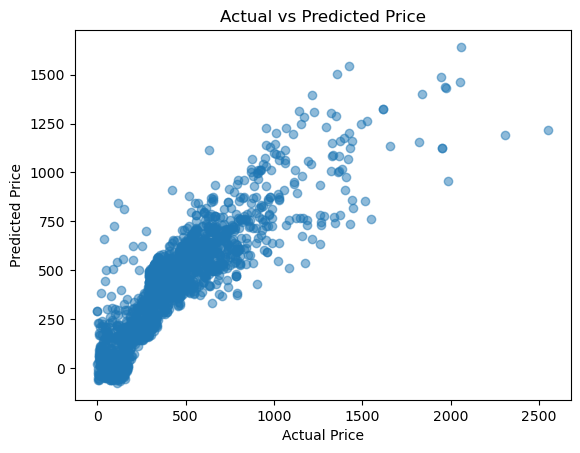

In [432]:
model.eval()  # This sets the model to evaluation mode
with torch.no_grad():
    predictions = model(X_test_tensor)
    test_loss = criterion(predictions, y_test_tensor)
    print(f'Test Loss: {test_loss.item():.4f}')

# Plotting our results
import matplotlib.pyplot as plt

plt.scatter(y_test, predictions.numpy(), alpha=0.5)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Price')
plt.show()

In [434]:
from sklearn.metrics import r2_score

# Evaluate the model
#model.eval()  # Set the model to evaluation mode
with torch.no_grad():
    predictions = model(X_test_tensor).numpy()
    actuals = y_test_tensor.numpy()

r2 = r2_score(actuals, predictions)
print(f'R2 score: {r2:.4f}')

R2 score: 0.7607
